In [1]:
import sys
import matplotlib.pyplot as plt
plt.show()

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

import matplotlib
matplotlib.use('Agg')
%matplotlib inline

sys.path.insert(0,'..')

from src.paper_figures import *


# Noise Viz

In [2]:
#plot_noise(subset = True)
#plot_noise(subset = False)

# Supplemental

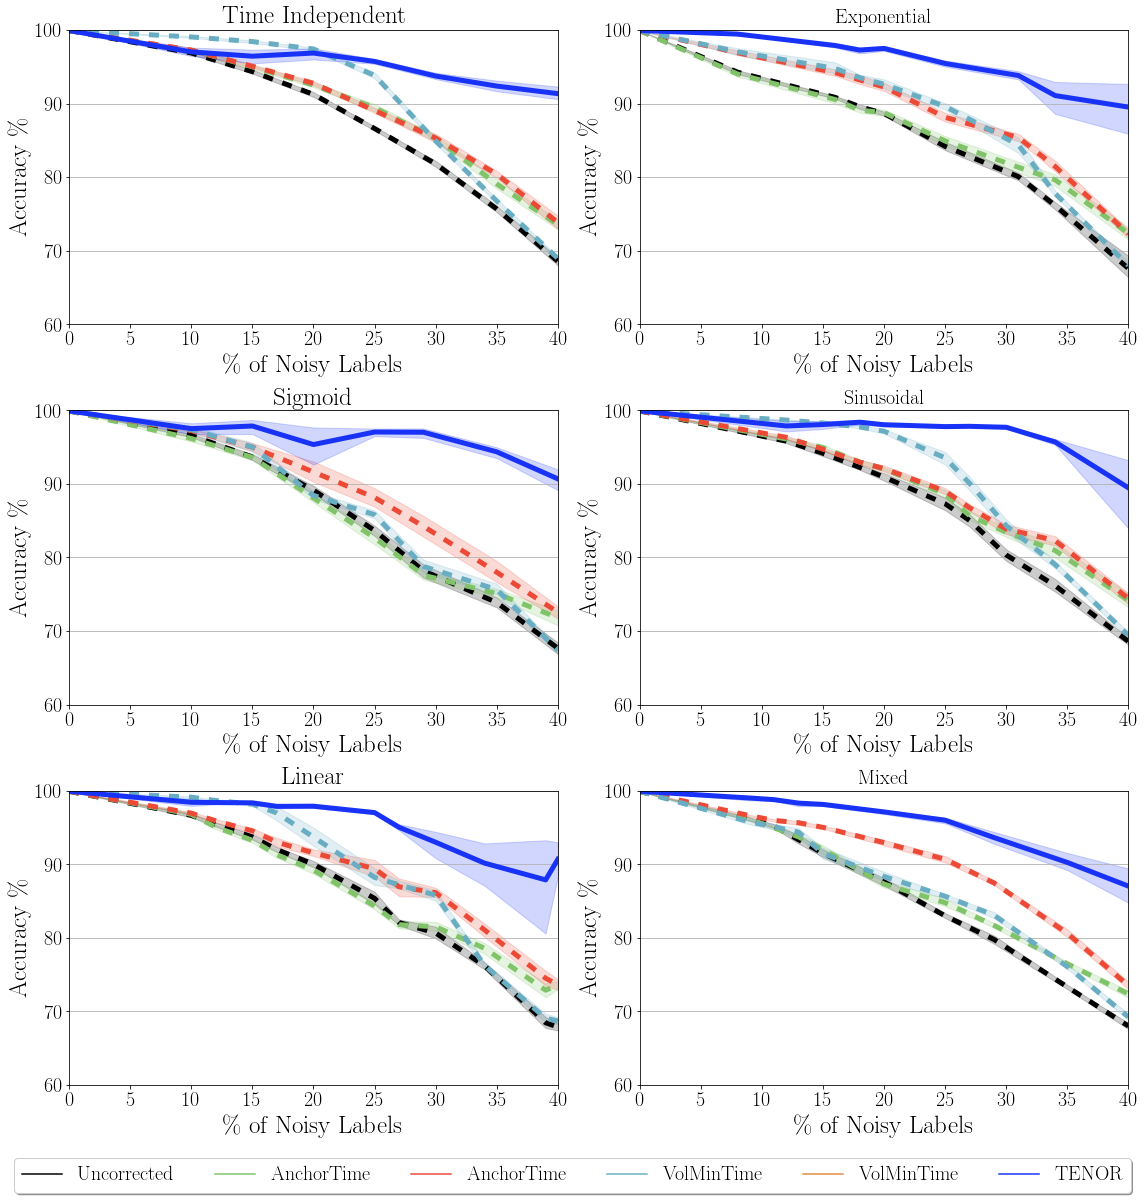

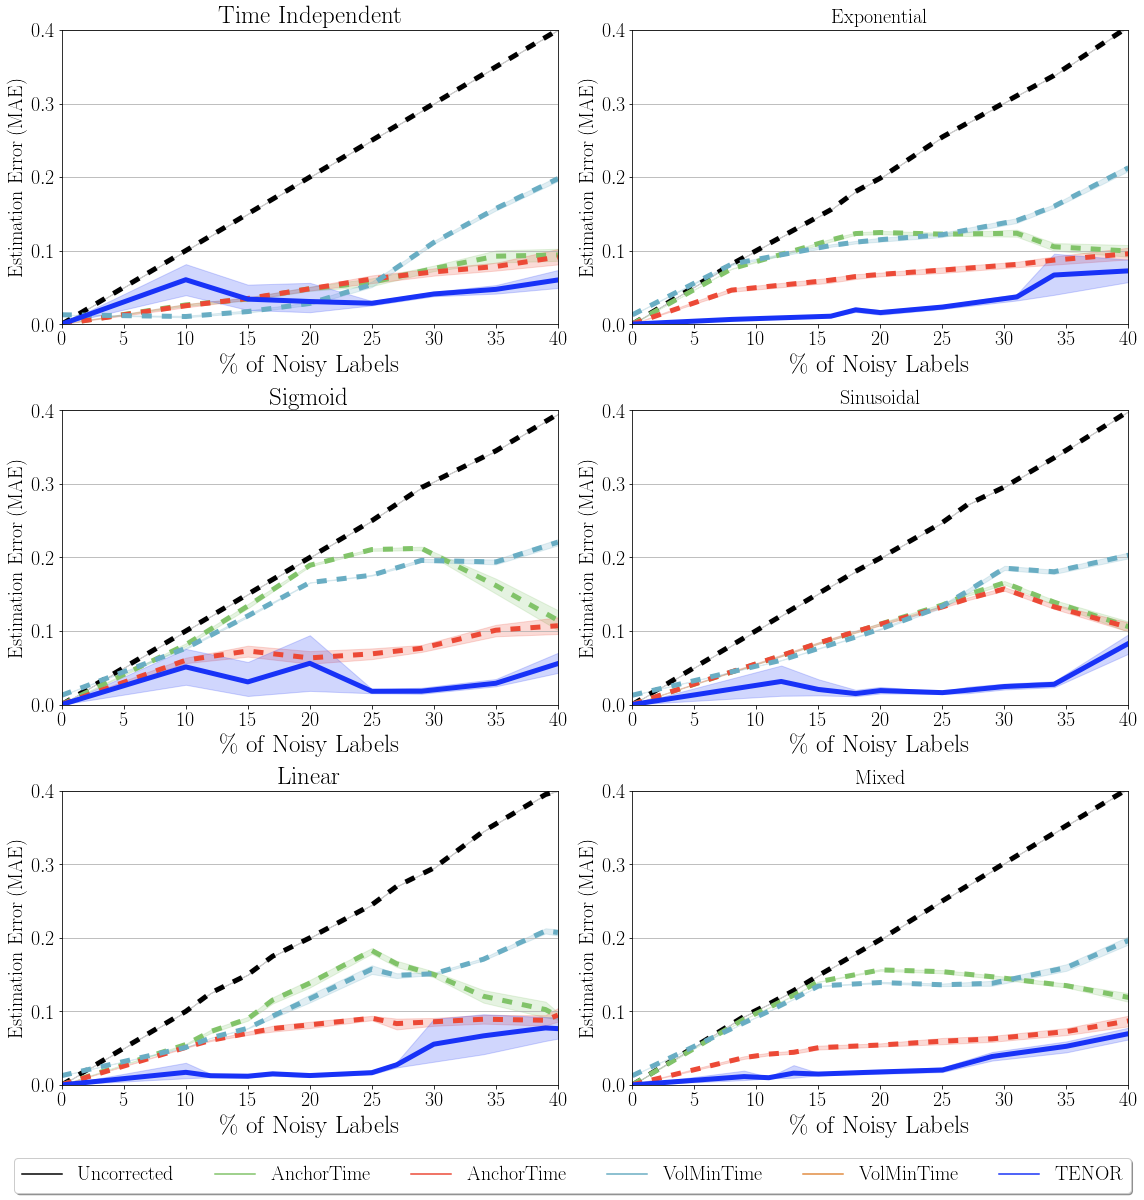

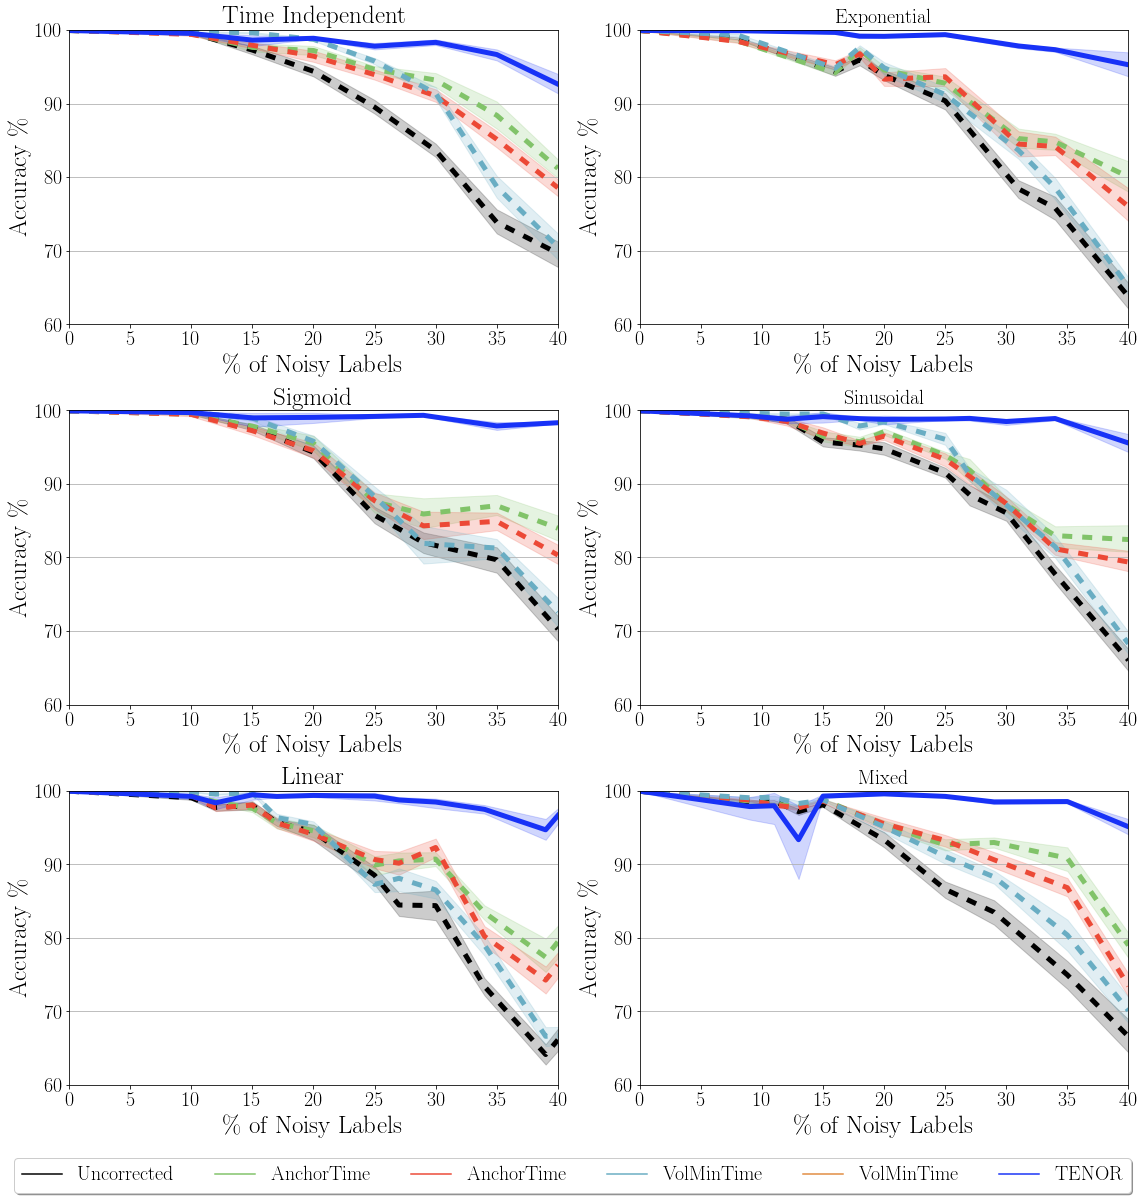

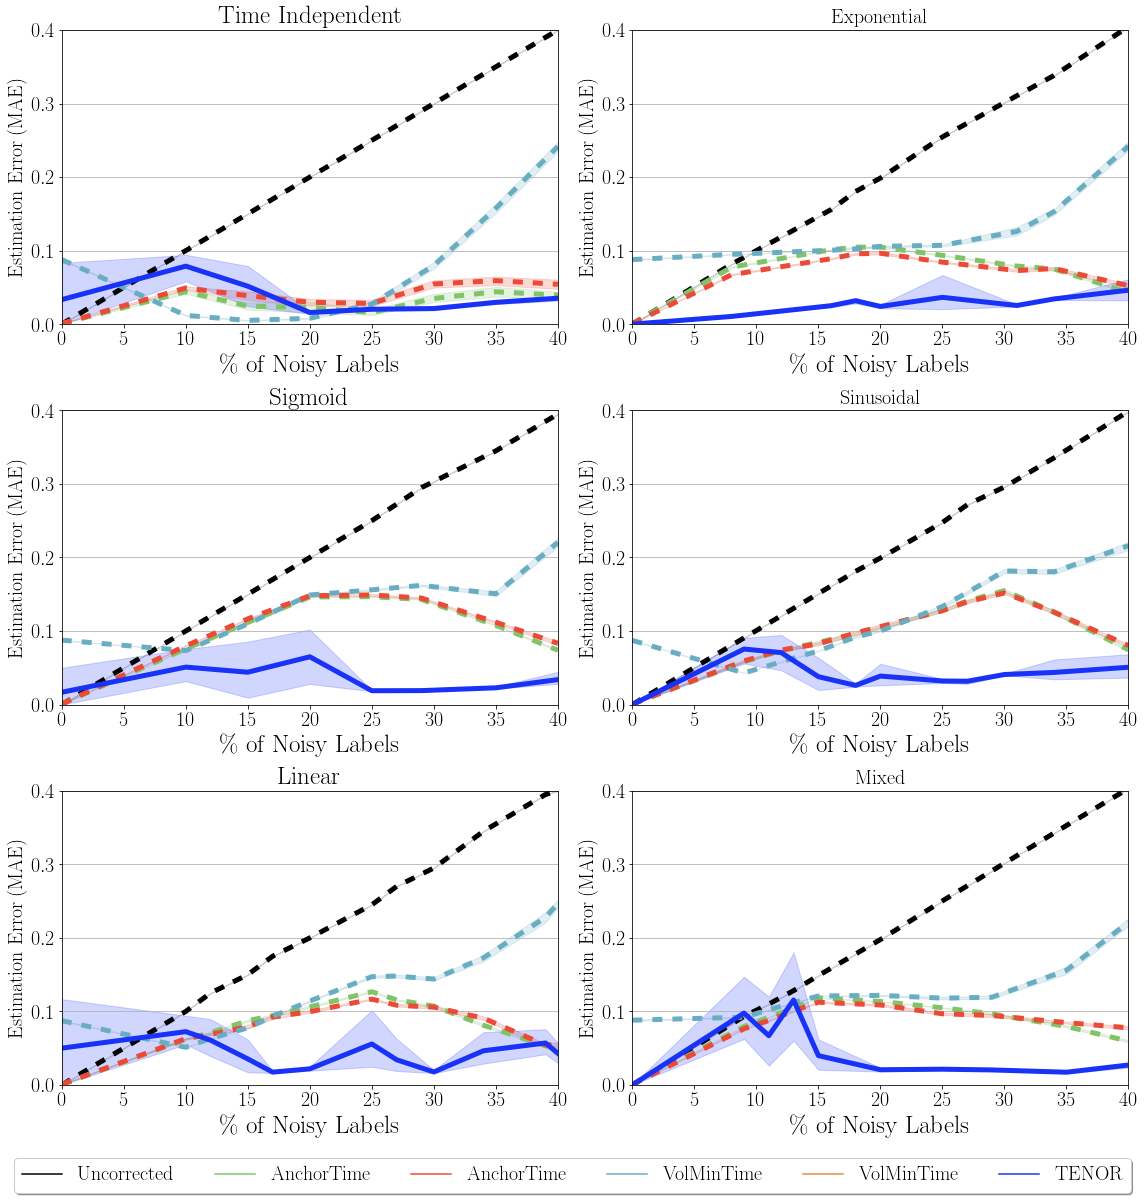

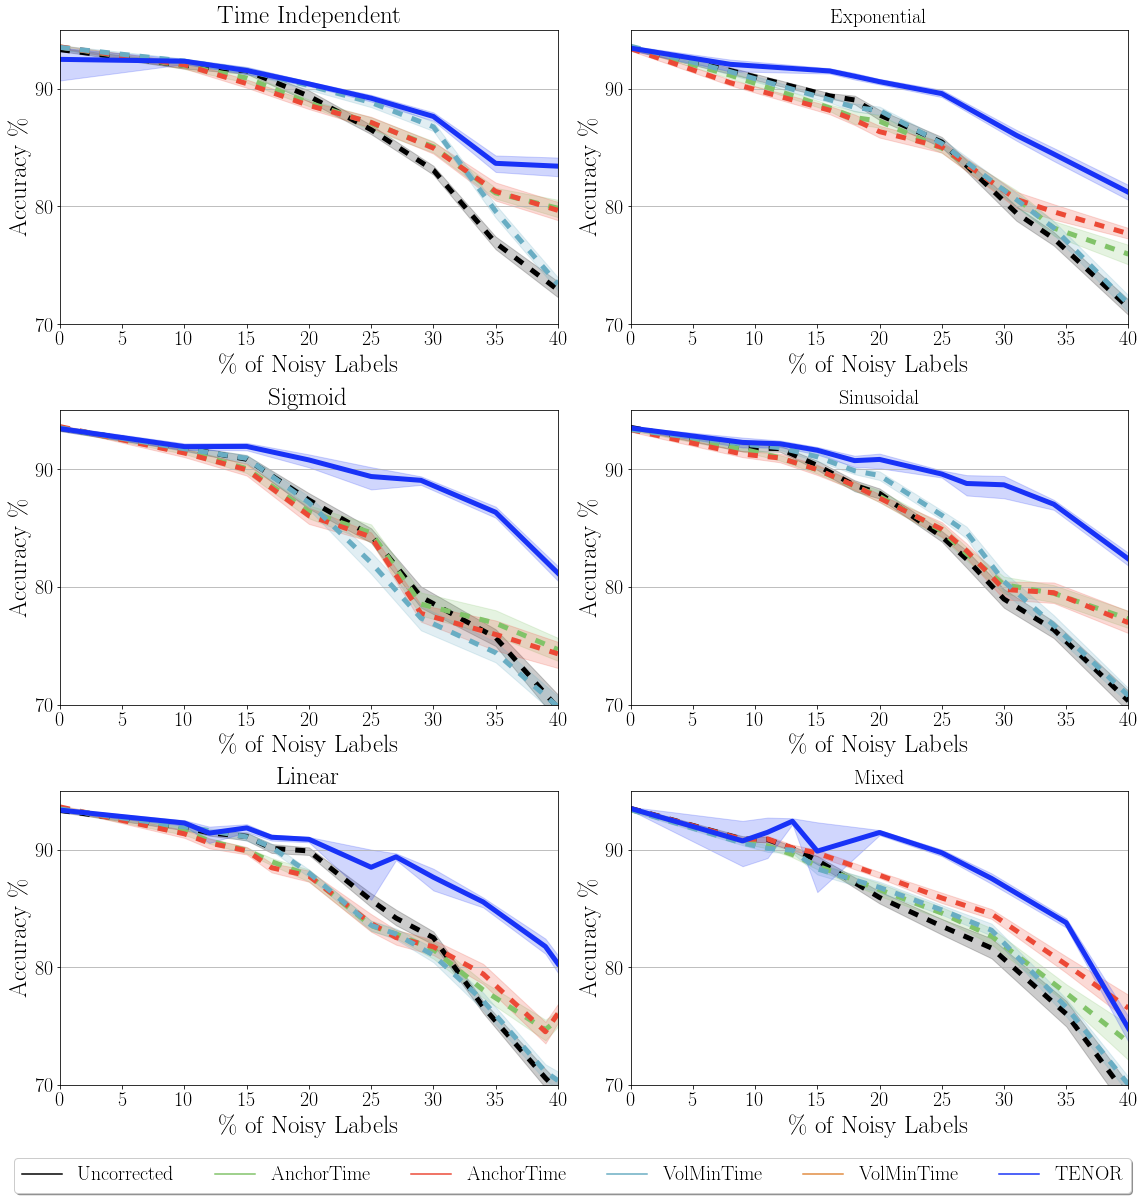

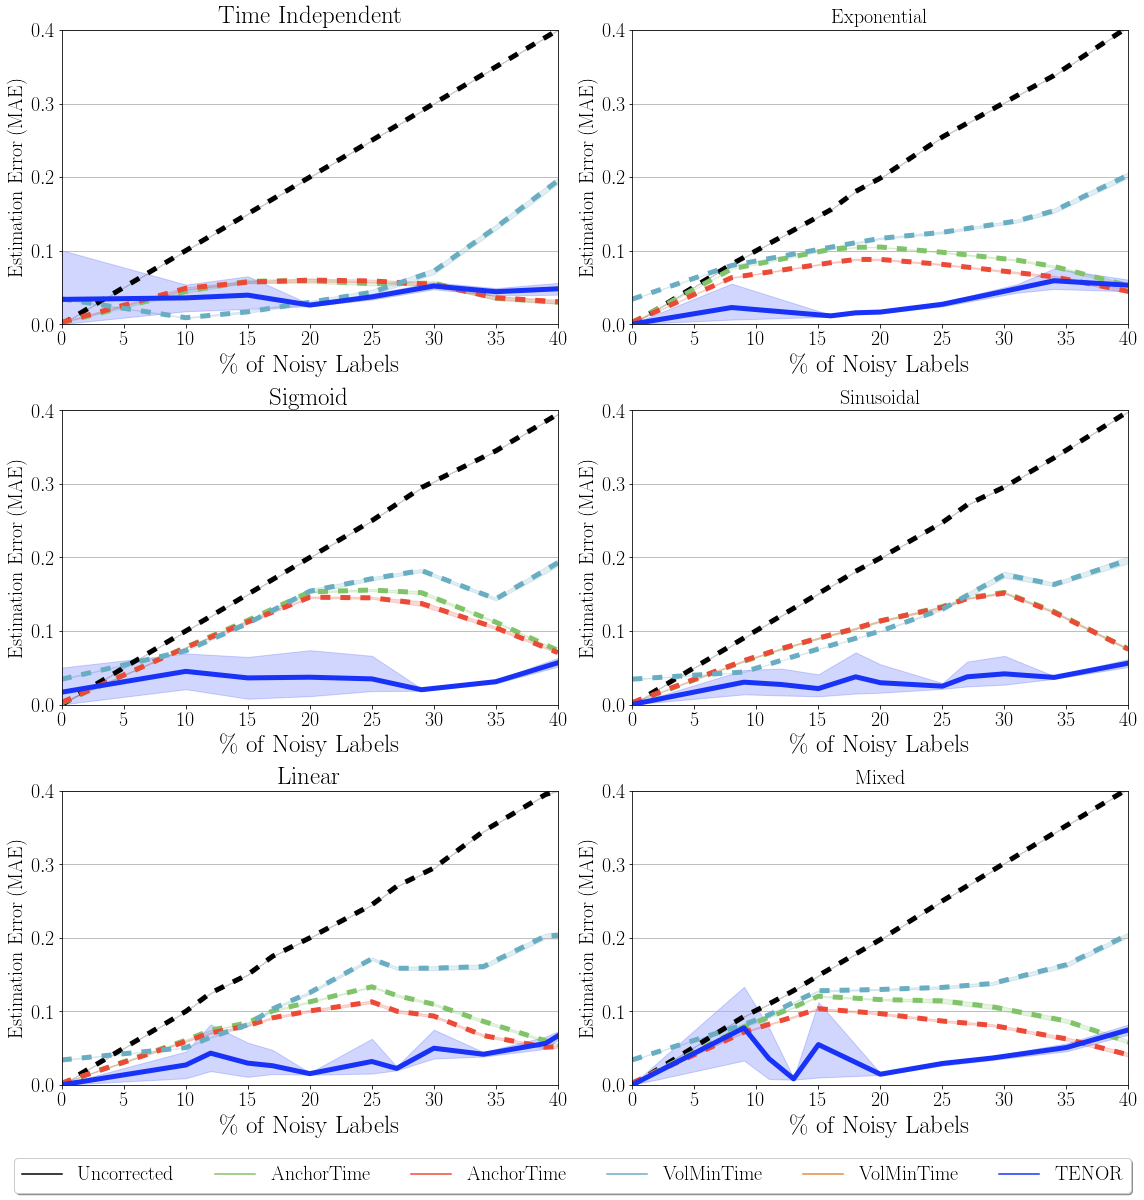

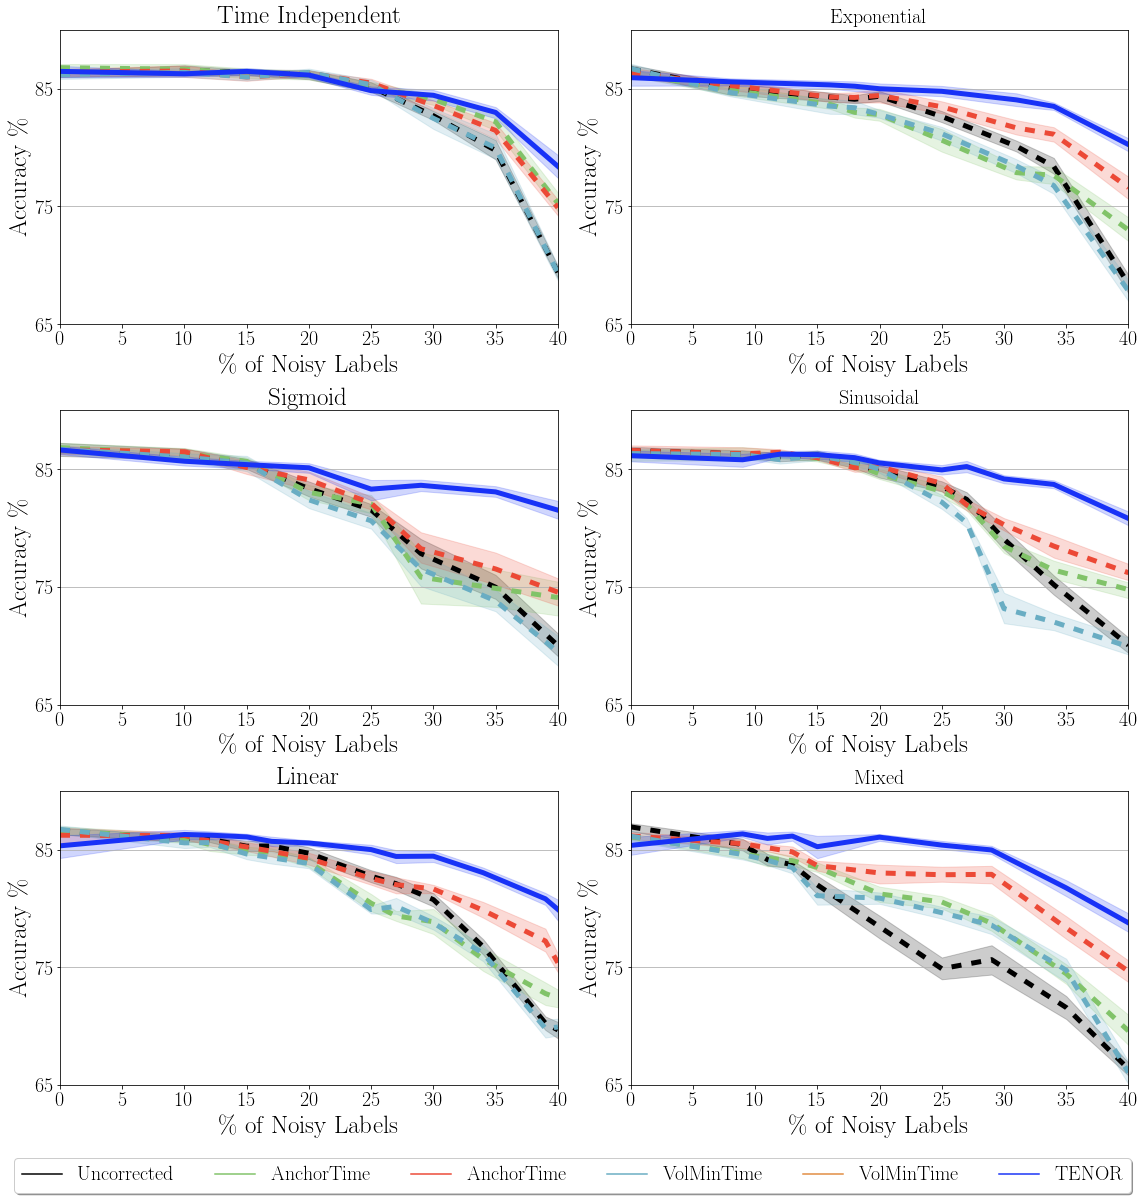

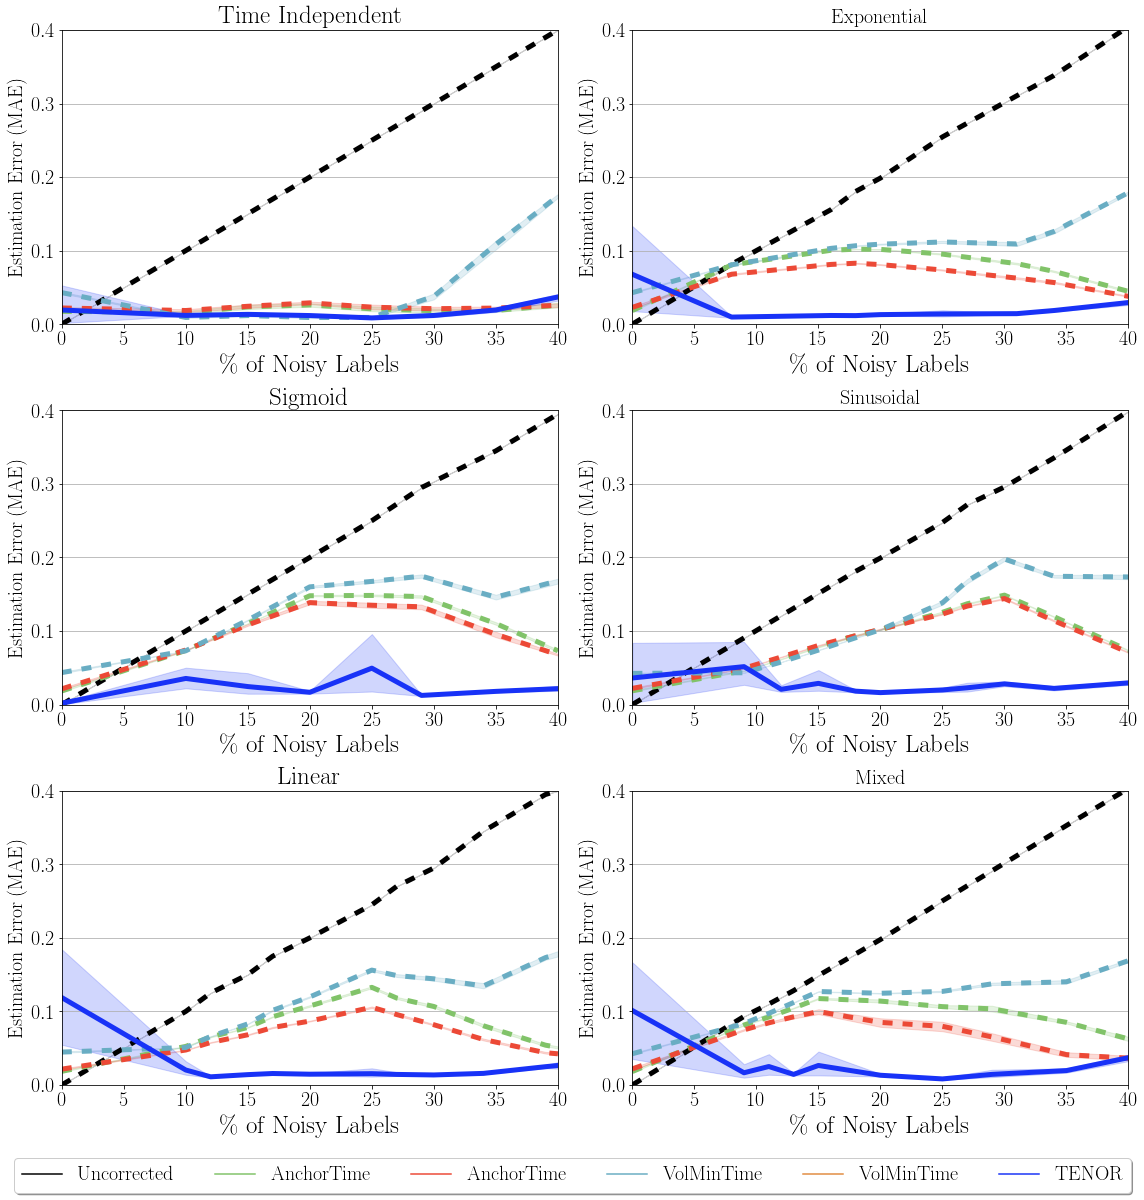

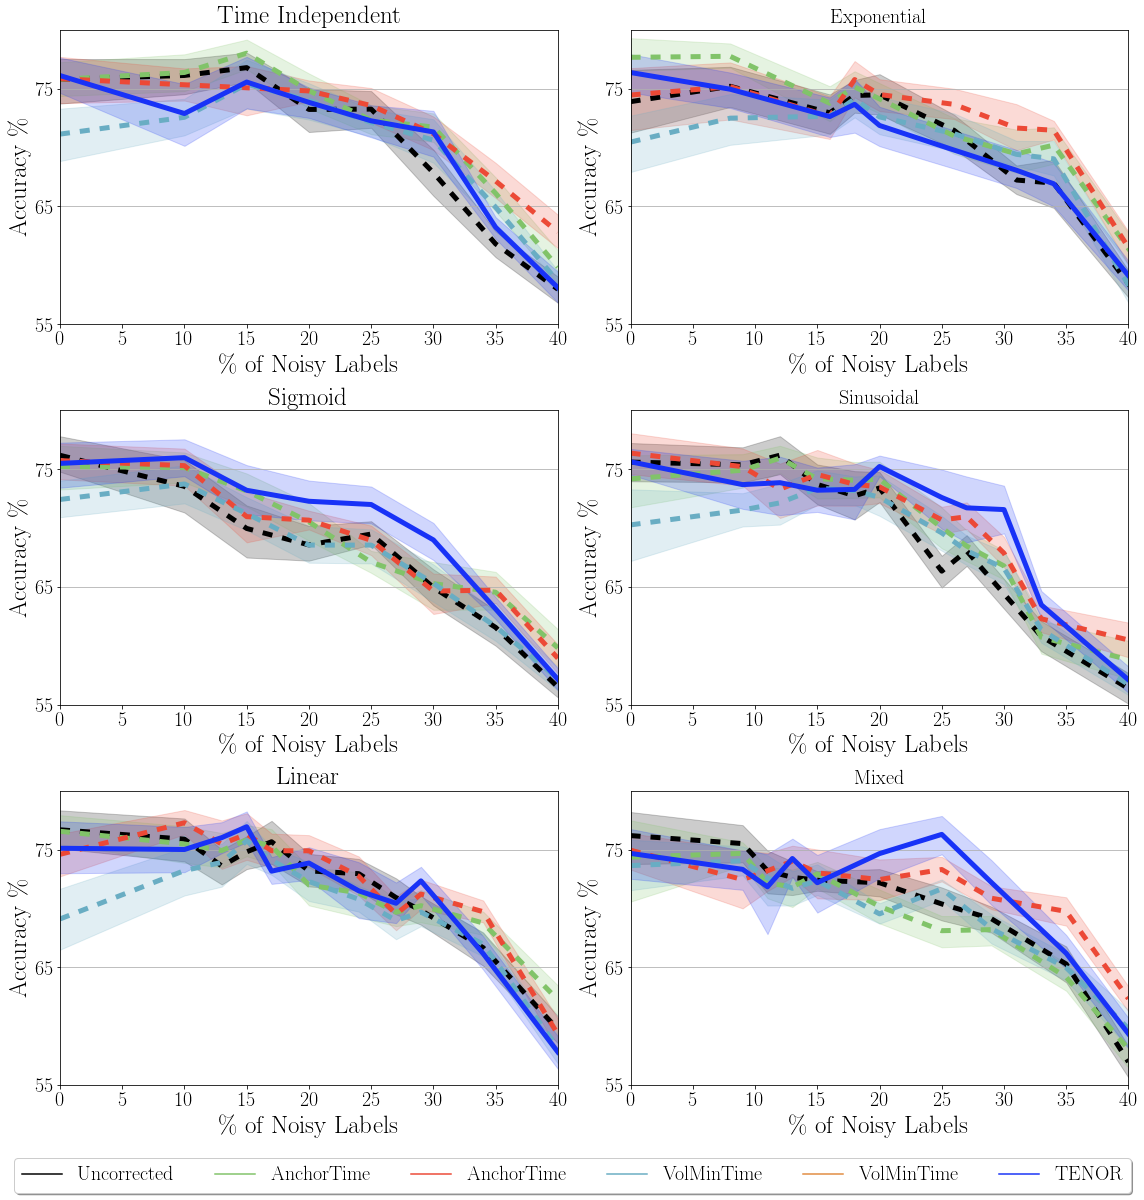

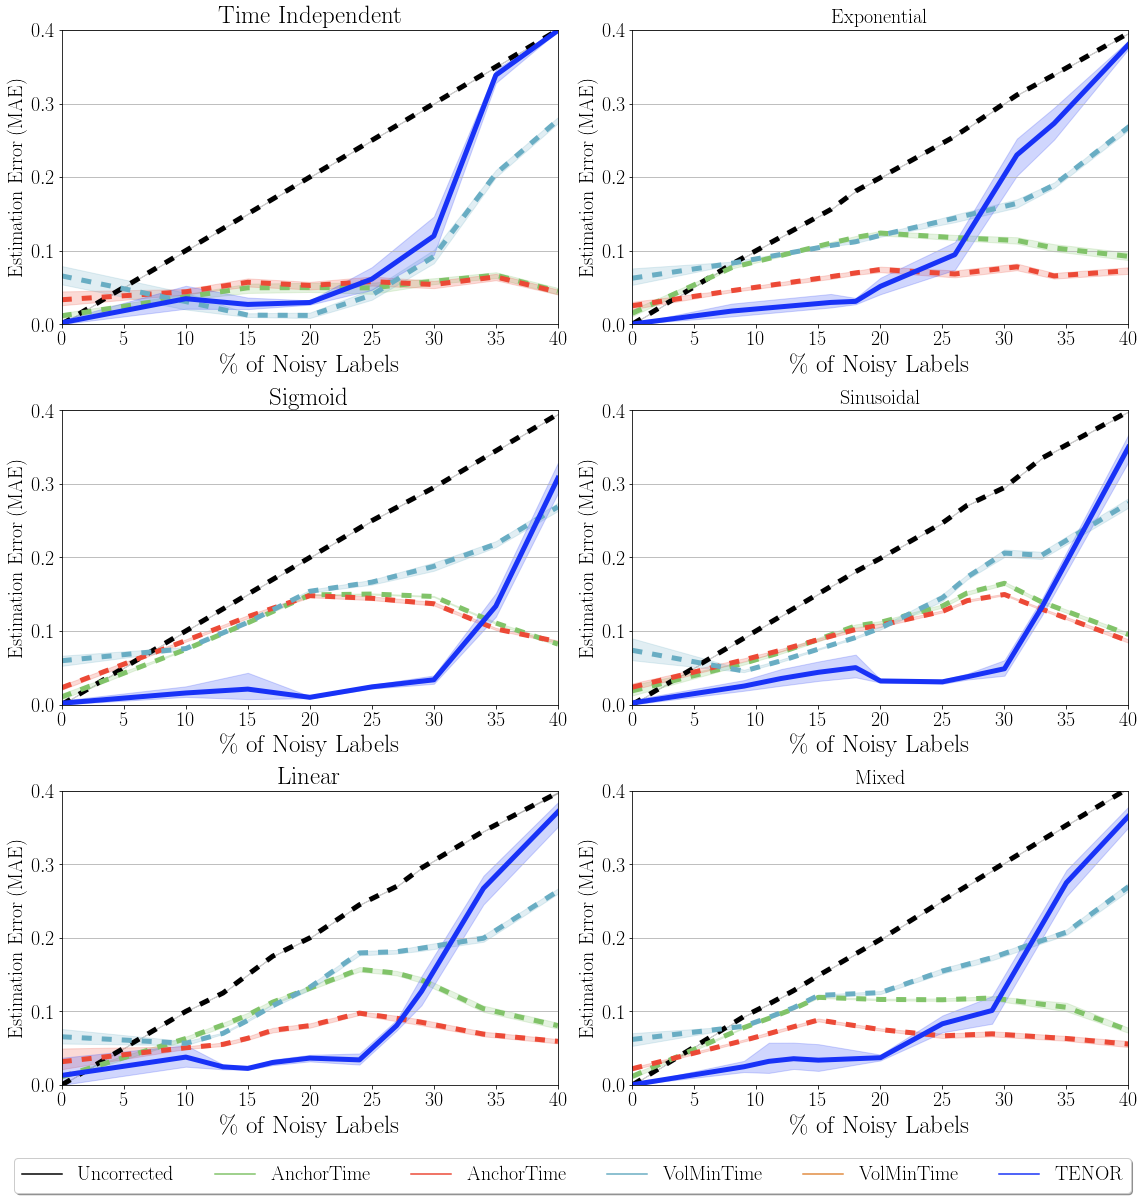

In [3]:
for dataset in ["synthetic", "HAR", "HAR70", "EEG_SLEEP", "EEG_EYE"]:
    plot_all_acc(dataset)
    plot_all_recon(dataset)

# Main

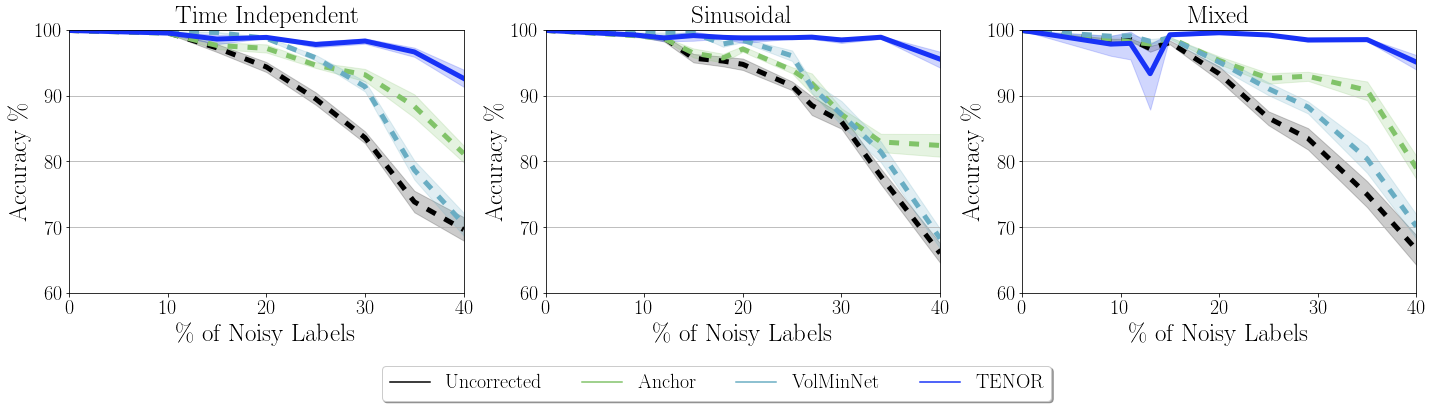

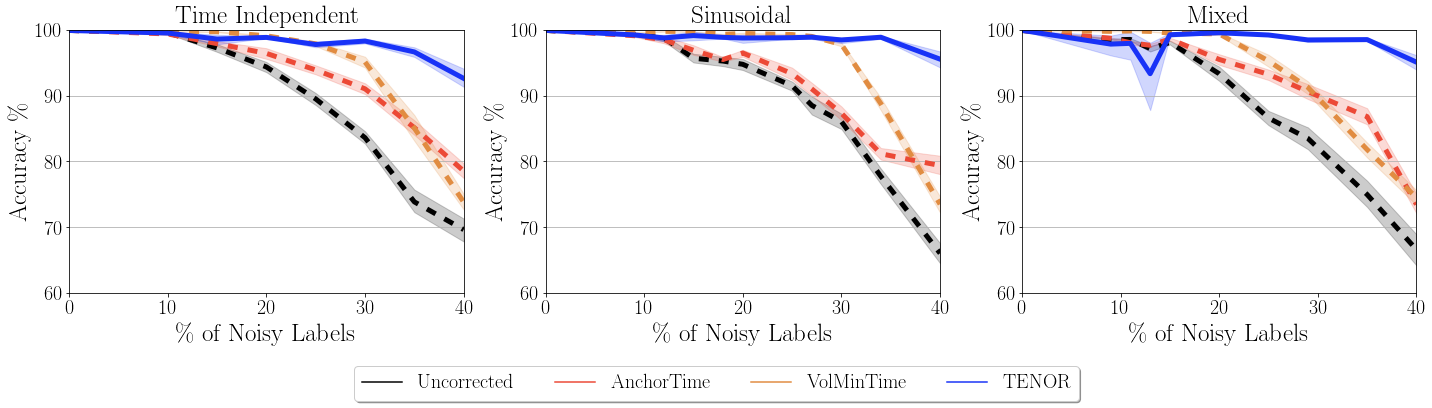

In [3]:
plot_main("HAR", limited="basic", subset_noise=True, lam_frob = 0.05)
plot_main("HAR", limited="time", subset_noise=True, lam_frob = 0.05)

# Motivation

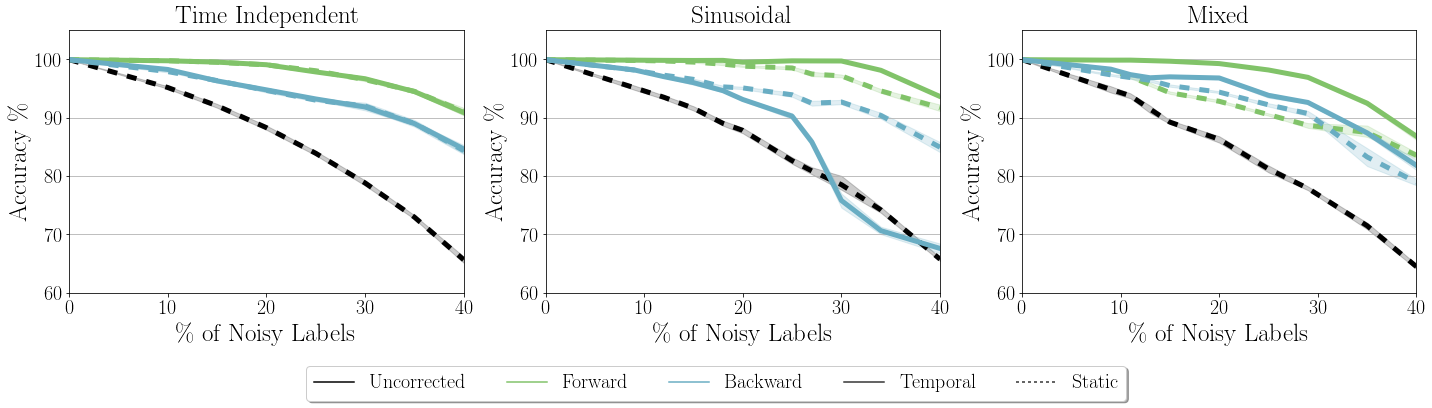

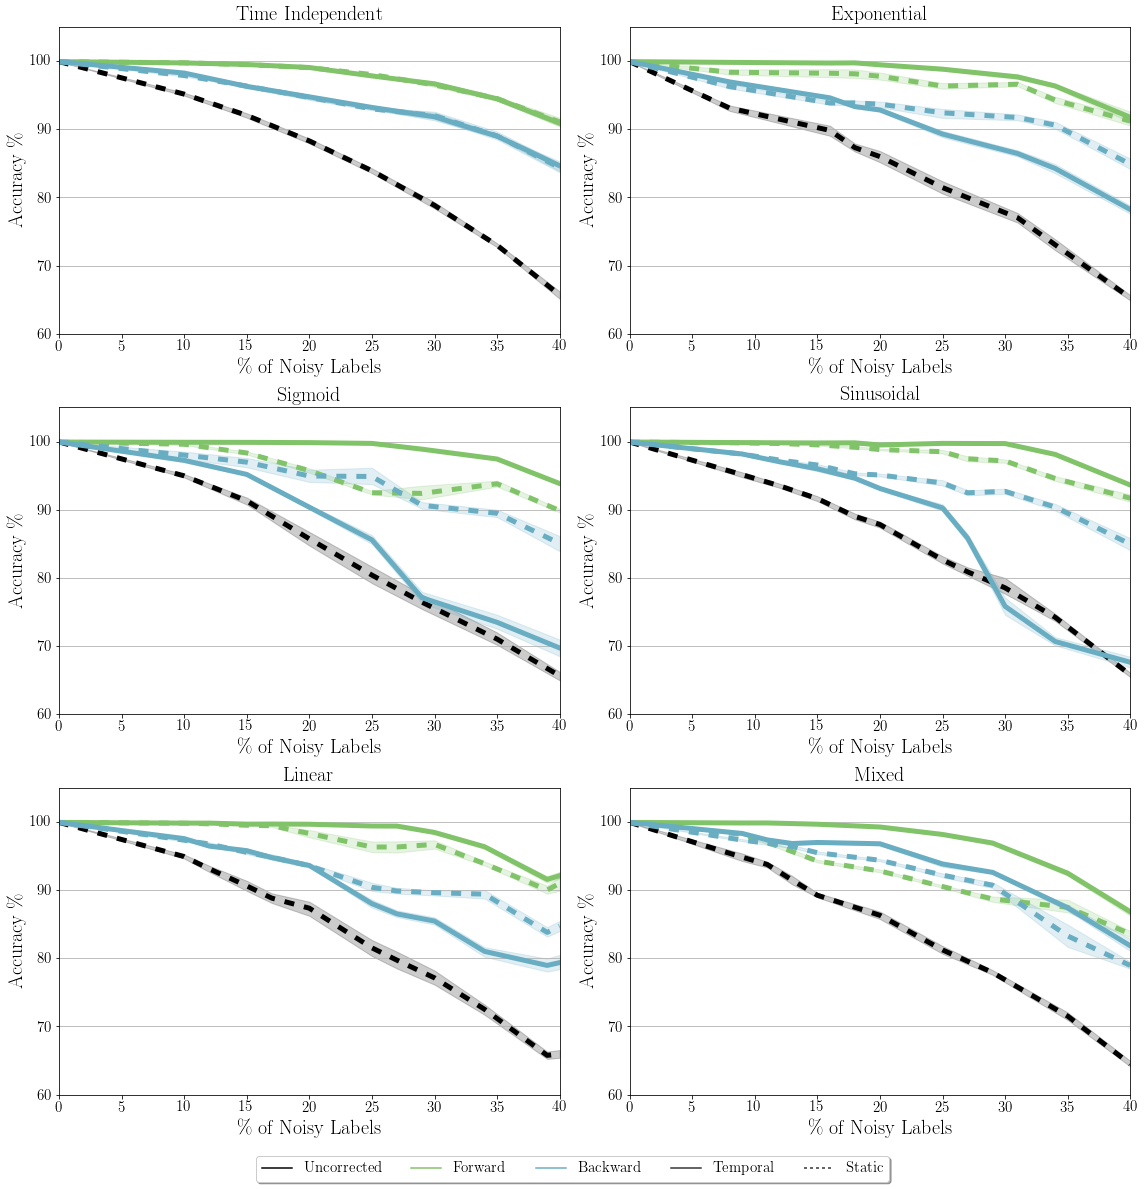

In [8]:
plot_motivation(subset_noise=True, variant = "class_independent")
plot_motivation(subset_noise=False, variant = "class_independent")

In [142]:
def generate_main_table(noise_type = "basic", acc = True):
    value_list = []

    exp = "T_estimation"
    
    methods_list = ["BCE", "Anchor", "Vol_Min", "Anchor_Time",  "Vol_Min_Time", "Ours"]
    for method in methods_list:
        
        value_sub_list = []

        for dataset in ["synthetic", "HAR", "HAR70", "EEG_SLEEP", "EEG_EYE"]:
            for noise in [25., 40.]:
                df_path = generate_path_plot(dataset, exp, noise_type)
                df = pd.read_csv(df_path)
                df["Noise Frequency"] = df["Noise Frequency"]*100
                df["Accuracy"] = df["Accuracy"]*100

                if acc:
                    values = df[(df["Noise Frequency"] == noise) & (df["Method"] == method)]["Accuracy"].values
                else:
                    values = df[(df["Noise Frequency"] == noise) & (df["Method"] == method)]["Estimation Error"].values
                mean = "{:.2f}".format(np.mean(values))
                std = "{:.2f}".format(np.std(values))
                
                if not acc and method == "BCE":
                    formatted = "NA"

                else:
                    formatted = mean + r"$\pm$" + std

                value_sub_list.append(formatted)
        value_list.append(value_sub_list)


    values = np.array(value_list)

    # hierarchical indices and columns
    index = pd.MultiIndex.from_product([["Uncorrected", "Anchor",  "VolMinNet","AnchorTime", "VolMinTime", "TENOR"]]
                                       )
    columns = pd.MultiIndex.from_product([["\textds{synthetic}", "\textds{HAR}", "\textds{HAR70}", "\textds{EEG_SLEEP}", "\textds{EEG_EYE}"], ['Low Noise', 'High Noise']],
                                         )

    # create the DataFrame
    results_df = pd.DataFrame(values, index=index, columns=columns)
    return results_df

def generate_main_table_low(noise_type = "basic", acc = True, lam_frob = 0.01):
    value_list = []

    exp = "T_estimation"
    
    noise = 25.
    
    methods_list = ["BCE", "Anchor", "Vol_Min", "Anchor_Time",  "Vol_Min_Time", "Ours"]
    for method in methods_list:
        
        value_sub_list = []

        for dataset in ["synthetic", "HAR", "HAR70", "EEG_SLEEP", "EEG_EYE"]:
            df_path = generate_path_plot(dataset, exp, noise_type)
            df = pd.read_csv(df_path)
            df["Noise Frequency"] = df["Noise Frequency"]*100
            df["Accuracy"] = df["Accuracy"]*100

            if acc:
                values = df[(df["Noise Frequency"] == noise) & (df["Method"] == method)]["Accuracy"].values
                mean = "{:.1f}".format(np.mean(values))
                std = "{:.1f}".format(np.std(values))
            else:
                values = df[(df["Noise Frequency"] == noise) & (df["Method"] == method)]["Estimation Error"].values
                mean = "{:.2f}".format(np.mean(values))
                std = "{:.3f}".format(np.std(values))

            if not acc and method == "BCE":
                formatted = "NA"

            else:
                formatted = mean + r"$\pm$" + std

            value_sub_list.append(formatted)
        value_list.append(value_sub_list)


    values = np.array(value_list)

    # hierarchical indices and columns
    index = pd.MultiIndex.from_product([["Uncorrected", "Anchor",  "VolMinNet","AnchorTime", "VolMinTime", "TENOR"]]
                                       )
    columns = pd.MultiIndex.from_product([["\textds{synthetic}", "\textds{HAR}", "\textds{HAR70}", "\textds{EEG_SLEEP}", "\textds{EEG_EYE}"], ['Accuracy', 'MAE']],
                                         )

    # create the DataFrame
    results_df = pd.DataFrame(values, index=index, columns=columns)
    return results_df

def generate_main_table_both(noise_type = "mix", lam_frob = None):
    
    value_list = []

    exp = "T_estimation"
    
    
    methods_list = ["BCE", "Anchor", "Vol_Min", "Anchor_Time",  "Vol_Min_Time", "Ours"]
    for method in methods_list:
        
        value_sub_list = []

        for dataset in ["synthetic", "HAR", "HAR70", "EEG_SLEEP", "EEG_EYE"]:
            for acc in [True, False]:
                df_path = generate_path_plot(dataset, exp, noise_type)
                df = pd.read_csv(df_path)
                
                df["Noise Frequency"] = df["Noise Frequency"].round(1)*100
                df["Accuracy"] = df["Accuracy"]*100
                noise_list = [29.0, 30.0, 31.0]

                df_subset = df[(df["Noise Frequency"].isin(noise_list)) & (df["Method"] == method)]

                if acc:
                    values = df_subset["Accuracy"].values
                    mean = "{:.1f}".format(np.mean(values))
                    std = "{:.1f}".format(np.std(values))
                else:
                    values = df_subset["Estimation Error"].values
                    mean = "{:.2f}".format(np.mean(values))
                    std = "{:.3f}".format(np.std(values))
                
                if not acc and method == "BCE":
                    formatted = r"{\NA}"

                else:
                    formatted = mean + r"$\pm$" + std
                    
                

                value_sub_list.append(formatted)
        value_list.append(value_sub_list)


    values = np.array(value_list)

    # hierarchical indices and columns
    index = pd.MultiIndex.from_product([["Uncorrected", "Anchor",  "VolMinNet","AnchorTime", "VolMinTime", "TENOR"]]
                                       )
    columns = pd.MultiIndex.from_product([["\textds{synth}", "\textds{har}", "\textds{har70}", "\textds{eeg\_sleep}", "\textds{eeg\_eye}"], ['Accuracy', 'MAE']],
                                         )

    # create the DataFrame
    results_df = pd.DataFrame(values, index=index, columns=columns)
    return results_df

In [143]:
both_df =  generate_main_table_both(noise_type = "mix")
both_df

\textds{synth}                  \textds{har}                  \
                  Accuracy             MAE      Accuracy             MAE   
Uncorrected   79.8$\pm$1.1           {\NA}  83.5$\pm$3.3           {\NA}   
Anchor        81.7$\pm$0.6  0.15$\pm$0.004  93.0$\pm$1.4  0.10$\pm$0.002   
VolMinNet     83.1$\pm$0.8  0.14$\pm$0.007  88.3$\pm$1.8  0.12$\pm$0.004   
AnchorTime    87.5$\pm$0.6  0.06$\pm$0.008  90.6$\pm$2.1  0.09$\pm$0.004   
VolMinTime    89.4$\pm$0.8  0.06$\pm$0.006  91.3$\pm$1.9  0.08$\pm$0.001   
TENOR         93.6$\pm$1.6  0.04$\pm$0.012  98.5$\pm$0.5  0.02$\pm$0.003   

            \textds{har70}                 \textds{eeg\_sleep}  \
                  Accuracy             MAE            Accuracy   
Uncorrected   81.6$\pm$1.7           {\NA}        75.7$\pm$2.5   
Anchor        82.6$\pm$1.4  0.11$\pm$0.006        78.7$\pm$1.4   
VolMinNet     83.1$\pm$1.0  0.14$\pm$0.004        78.6$\pm$1.5   
AnchorTime    84.5$\pm$0.9  0.08$\pm$0.003        82.9$\pm$1.4   
VolMinTime    86.6$\pm$0.8  0.07$\pm$0.002        84.0$\pm$1.0   
TENOR         87.6$\pm$0.9  0.04$\pm$0.005        85.0$\pm$0.7   

                            \textds{eeg\_eye}                  
                        MAE          Accuracy             MAE  
Uncorrected           {\NA}      69.1$\pm$2.2           {\NA}  
Anchor       0.10$\pm$0.008      68.2$\pm$2.6  0.12$\pm$0.006  
VolMinNet    0.14$\pm$0.003      68.3$\pm$2.5  0.17$\pm$0.007  
AnchorTime   0.07$\pm$0.011      70.9$\pm$1.9  0.07$\pm$0.007  
VolMinTime   0.06$\pm$0.001      71.6$\pm$3.1  0.08$\pm$0.005  
TENOR        0.01$\pm$0.012      72.2$\pm$4.0  0.10$\pm$0.037

In [144]:
print(both_df.to_latex(escape = False, formatters={"name": str.upper},
                  float_format="{:.1f}".format,)) 

\begin{tabular}{lllllllllll}
\toprule
      & \multicolumn{2}{l}{\textds{synth}} & \multicolumn{2}{l}{\textds{har}} & \multicolumn{2}{l}{\textds{har70}} & \multicolumn{2}{l}{\textds{eeg\_sleep}} & \multicolumn{2}{l}{\textds{eeg\_eye}} \\
      &       Accuracy &             MAE &      Accuracy &             MAE &       Accuracy &             MAE &            Accuracy &             MAE &          Accuracy &             MAE \\
\midrule
Uncorrected &   79.8$\pm$1.1 &           {\NA} &  83.5$\pm$3.3 &           {\NA} &   81.6$\pm$1.7 &           {\NA} &        75.7$\pm$2.5 &           {\NA} &      69.1$\pm$2.2 &           {\NA} \\
Anchor &   81.7$\pm$0.6 &  0.15$\pm$0.004 &  93.0$\pm$1.4 &  0.10$\pm$0.002 &   82.6$\pm$1.4 &  0.11$\pm$0.006 &        78.7$\pm$1.4 &  0.10$\pm$0.008 &      68.2$\pm$2.6 &  0.12$\pm$0.006 \\
VolMinNet &   83.1$\pm$0.8 &  0.14$\pm$0.007 &  88.3$\pm$1.8 &  0.12$\pm$0.004 &   83.1$\pm$1.0 &  0.14$\pm$0.004 &        78.6$\pm$1.5 &  0.14$\pm$0.003 &      68.3$\pm$2.5

In [3]:
def generate_noise_flex_table(dataset="synthetic", acc = True):
    value_list = []

    exp = "T_estimation"
    
    methods_list = ["BCE", "Anchor", "Vol_Min", "Anchor_Time",  "Vol_Min_Time", "Ours"]
    for method in methods_list:
        
        value_sub_list = []

        for noise_type in ["basic", "exp", "lin", "sig", "sin", "mix"]:
            for noise in [25., 40.]:
                df_path = generate_path_plot(dataset, exp, noise_type)
                df = pd.read_csv(df_path)
                df["Noise Frequency"] = df["Noise Frequency"]*100
                df["Accuracy"] = df["Accuracy"]*100
                
                if acc:
                    values = df[(df["Noise Frequency"] == noise) & (df["Method"] == method)]["Accuracy"].values
                    mean = "{:.1f}".format(np.mean(values))
                    std = "{:.1f}".format(np.std(values))
                else:
                    values = df[(df["Noise Frequency"] == noise) & (df["Method"] == method)]["Estimation Error"].values
                    mean = "{:.2f}".format(np.mean(values))
                    std = "{:.3f}".format(np.std(values))
                
                if not acc and method == "BCE":
                    formatted = r"{\NA}"

                else:
                    formatted = mean + r"$\pm$" + std

                value_sub_list.append(formatted)
        value_list.append(value_sub_list)


    values = np.array(value_list)

    # hierarchical indices and columns
    index = pd.MultiIndex.from_product([["Uncorrected", "Anchor",  "VolMinNet","AnchorTime", "VolMinTime", "TENOR"]]
                                       )
    columns = pd.MultiIndex.from_product([["Time Independent", "Exponential", "Linear", "Sigmoidal", "Sinusoidal", "Mixed"], ['Low Noise', 'High Noise']],
                                         )

    # create the DataFrame
    results_df = pd.DataFrame(values, index=index, columns=columns)
    return results_df

def generate_noise_flex_table_low(dataset="synthetic", acc = True, n_states = 2):
    value_list = []

    exp = "T_estimation"
    
    methods_list = ["BCE", "Anchor", "Vol_Min", "Anchor_Time",  "Vol_Min_Time", "Ours"]
    
    for method in methods_list:
        
        value_sub_list = []

        for noise_type in ["basic", "exp", "lin", "sig", "sin", "mix"]:
            for acc in [True, False]:
                df_path = generate_path_plot(dataset, exp, noise_type, n_states = n_states)

                df = pd.read_csv(df_path)
                
                df["Noise Frequency"] = df["Noise Frequency"].round(1)*100
                df["Accuracy"] = df["Accuracy"]*100
                
                if n_states == 3:
                    noise_list = [40.]
                else:
                    noise_list = [29.0, 30.0, 31.0]

                df_subset = df[(df["Noise Frequency"].isin(noise_list)) & (df["Method"] == method)]

                if acc:
                    values = df_subset["Accuracy"].values
                    mean = "{:.1f}".format(np.mean(values))
                    std = "{:.1f}".format(np.std(values))
                else:
                    values = df_subset["Estimation Error"].values
                    mean = "{:.2f}".format(np.mean(values))
                    std = "{:.3f}".format(np.std(values))
                
                if not acc and method == "BCE":
                    formatted = r"{\NA}"

                else:
                    formatted = mean + r"$\pm$" + std
                
                value_sub_list.append(formatted)
                
        value_list.append(value_sub_list)


    values = np.array(value_list)

    # hierarchical indices and columns
    index = pd.MultiIndex.from_product([["Uncorrected", "Anchor",  "VolMinNet","AnchorTime", "VolMinTime", "TENOR"]]
                                       )
    columns = pd.MultiIndex.from_product([["Time Independent", "Exponential", "Linear", "Sigmoidal", "Sinusoidal", "Mixed"], ['Accuracy', 'MAE']],
                                         )

    # create the DataFrame
    results_df = pd.DataFrame(values, index=index, columns=columns)
    return results_df

In [4]:
noise_df =  generate_noise_flex_table_low(dataset = "HAR", acc = True)
print(noise_df.to_latex(escape = False, formatters={"name": str.upper},
                  float_format="{:.1f}".format,)) 

noise_df

\begin{tabular}{lllllllllllll}
\toprule
      & \multicolumn{2}{l}{Time Independent} & \multicolumn{2}{l}{Exponential} & \multicolumn{2}{l}{Linear} & \multicolumn{2}{l}{Sigmoidal} & \multicolumn{2}{l}{Sinusoidal} & \multicolumn{2}{l}{Mixed} \\
      &         Accuracy &             MAE &      Accuracy &             MAE &      Accuracy &             MAE &      Accuracy &             MAE &      Accuracy &             MAE &      Accuracy &             MAE \\
\midrule
Uncorrected &     83.6$\pm$1.8 &           {\NA} &  77.1$\pm$3.1 &           {\NA} &  80.7$\pm$6.1 &           {\NA} &  82.0$\pm$2.8 &           {\NA} &  84.1$\pm$5.2 &           {\NA} &  83.5$\pm$3.3 &           {\NA} \\
Anchor &     93.2$\pm$1.9 &  0.03$\pm$0.011 &  85.0$\pm$2.4 &  0.08$\pm$0.004 &  88.2$\pm$4.0 &  0.10$\pm$0.015 &  85.9$\pm$4.1 &  0.14$\pm$0.001 &  87.3$\pm$4.5 &  0.14$\pm$0.013 &  93.0$\pm$1.4 &  0.10$\pm$0.002 \\
VolMinNet &     91.4$\pm$1.6 &  0.08$\pm$0.009 &  81.1$\pm$3.7 &  0.14$\pm$0.017 &  84.5$\pm

Time Independent                   Exponential                  \
                    Accuracy             MAE      Accuracy             MAE   
Uncorrected     83.6$\pm$1.8           {\NA}  77.1$\pm$3.1           {\NA}   
Anchor          93.2$\pm$1.9  0.03$\pm$0.011  85.0$\pm$2.4  0.08$\pm$0.004   
VolMinNet       91.4$\pm$1.6  0.08$\pm$0.009  81.1$\pm$3.7  0.14$\pm$0.017   
AnchorTime      91.1$\pm$1.7  0.05$\pm$0.010  84.3$\pm$3.1  0.07$\pm$0.004   
VolMinTime      95.1$\pm$1.6  0.07$\pm$0.003  86.6$\pm$2.6  0.08$\pm$0.011   
TENOR           98.3$\pm$0.8  0.02$\pm$0.005  97.6$\pm$0.6  0.03$\pm$0.005   

                   Linear                     Sigmoidal                  \
                 Accuracy             MAE      Accuracy             MAE   
Uncorrected  80.7$\pm$6.1           {\NA}  82.0$\pm$2.8           {\NA}   
Anchor       88.2$\pm$4.0  0.10$\pm$0.015  85.9$\pm$4.1  0.14$\pm$0.001   
VolMinNet    84.5$\pm$4.8  0.15$\pm$0.014  81.9$\pm$5.1  0.16$\pm$0.002   
AnchorTime   87.5$\pm$5.9  0.10$\pm$0.009  84.3$\pm$3.8  0.14$\pm$0.002   
VolMinTime   88.3$\pm$6.5  0.07$\pm$0.015  92.2$\pm$3.3  0.06$\pm$0.004   
TENOR        98.2$\pm$1.3  0.03$\pm$0.041  99.3$\pm$0.3  0.02$\pm$0.002   

               Sinusoidal                         Mixed                  
                 Accuracy             MAE      Accuracy             MAE  
Uncorrected  84.1$\pm$5.2           {\NA}  83.5$\pm$3.3           {\NA}  
Anchor       87.3$\pm$4.5  0.14$\pm$0.013  93.0$\pm$1.4  0.10$\pm$0.002  
VolMinNet    86.6$\pm$5.0  0.17$\pm$0.015  88.3$\pm$1.8  0.12$\pm$0.004  
AnchorTime   86.5$\pm$4.5  0.14$\pm$0.012  90.6$\pm$2.1  0.09$\pm$0.004  
VolMinTime   95.2$\pm$4.7  0.07$\pm$0.009  91.3$\pm$1.9  0.08$\pm$0.001  
TENOR        98.8$\pm$0.7  0.04$\pm$0.020  98.5$\pm$0.5  0.02$\pm$0.003

In [5]:
noise_df =  generate_noise_flex_table_low(dataset = "synthetic", n_states = 3)
print(noise_df.to_latex(escape = False, formatters={"name": str.upper},
                  float_format="{:.1f}".format,)) 

noise_df

\begin{tabular}{lllllllllllll}
\toprule
      & \multicolumn{2}{l}{Time Independent} & \multicolumn{2}{l}{Exponential} & \multicolumn{2}{l}{Linear} & \multicolumn{2}{l}{Sigmoidal} & \multicolumn{2}{l}{Sinusoidal} & \multicolumn{2}{l}{Mixed} \\
      &         Accuracy &             MAE &      Accuracy &             MAE &      Accuracy &             MAE &      Accuracy &             MAE &      Accuracy &             MAE &      Accuracy &             MAE \\
\midrule
Uncorrected &     84.0$\pm$3.5 &           {\NA} &  79.0$\pm$1.7 &           {\NA} &  80.7$\pm$1.4 &           {\NA} &  83.4$\pm$2.1 &           {\NA} &  81.0$\pm$1.3 &           {\NA} &  78.7$\pm$2.3 &           {\NA} \\
Anchor &     90.9$\pm$1.4 &  0.03$\pm$0.005 &  88.1$\pm$0.8 &  0.04$\pm$0.005 &  89.0$\pm$0.9 &  0.05$\pm$0.003 &  88.7$\pm$1.4 &  0.07$\pm$0.016 &  89.7$\pm$0.7 &  0.06$\pm$0.002 &  87.1$\pm$1.4 &  0.06$\pm$0.010 \\
VolMinNet &     89.4$\pm$2.4 &  0.06$\pm$0.013 &  86.1$\pm$1.1 &  0.09$\pm$0.004 &  86.7$\pm

Time Independent                   Exponential                  \
                    Accuracy             MAE      Accuracy             MAE   
Uncorrected     84.0$\pm$3.5           {\NA}  79.0$\pm$1.7           {\NA}   
Anchor          90.9$\pm$1.4  0.03$\pm$0.005  88.1$\pm$0.8  0.04$\pm$0.005   
VolMinNet       89.4$\pm$2.4  0.06$\pm$0.013  86.1$\pm$1.1  0.09$\pm$0.004   
AnchorTime      91.1$\pm$1.5  0.03$\pm$0.004  89.0$\pm$0.9  0.04$\pm$0.004   
VolMinTime      92.8$\pm$2.1  0.03$\pm$0.007  89.9$\pm$0.7  0.04$\pm$0.002   
TENOR           93.4$\pm$4.2  0.03$\pm$0.036  92.5$\pm$0.7  0.03$\pm$0.004   

                   Linear                     Sigmoidal                  \
                 Accuracy             MAE      Accuracy             MAE   
Uncorrected  80.7$\pm$1.4           {\NA}  83.4$\pm$2.1           {\NA}   
Anchor       89.0$\pm$0.9  0.05$\pm$0.003  88.7$\pm$1.4  0.07$\pm$0.016   
VolMinNet    86.7$\pm$1.0  0.08$\pm$0.005  88.4$\pm$2.1  0.09$\pm$0.010   
AnchorTime   89.5$\pm$1.2  0.04$\pm$0.004  90.3$\pm$1.5  0.05$\pm$0.008   
VolMinTime   90.7$\pm$0.9  0.04$\pm$0.002  92.9$\pm$2.7  0.03$\pm$0.008   
TENOR        92.7$\pm$4.2  0.03$\pm$0.036  93.6$\pm$4.4  0.03$\pm$0.036   

               Sinusoidal                         Mixed                  
                 Accuracy             MAE      Accuracy             MAE  
Uncorrected  81.0$\pm$1.3           {\NA}  78.7$\pm$2.3           {\NA}  
Anchor       89.7$\pm$0.7  0.06$\pm$0.002  87.1$\pm$1.4  0.06$\pm$0.010  
VolMinNet    87.2$\pm$1.1  0.09$\pm$0.006  85.4$\pm$2.2  0.10$\pm$0.006  
AnchorTime   89.5$\pm$0.8  0.06$\pm$0.002  89.3$\pm$1.4  0.04$\pm$0.005  
VolMinTime   91.1$\pm$0.7  0.04$\pm$0.002  91.1$\pm$2.0  0.04$\pm$0.004  
TENOR        94.2$\pm$0.5  0.02$\pm$0.002  93.4$\pm$1.3  0.02$\pm$0.004

In [8]:
def generate_class_dep_table(dataset, acc = True, lam_frob = None):
    
    noise_type = "sin"
    n_states = 2
    
    noise_list = [29, 30, 31]
    
    value_list = []

    exp = "T_estimation"
    
    methods_list = ["BCE", "Anchor", "Vol_Min", "Anchor_Time",  "Vol_Min_Time", "Ours"]
    for method in methods_list:
        
        value_sub_list = []
        for variant in ["class_independent", "class_conditional"]:
            for acc in [True, False]:
                df_path = generate_path_plot(dataset, exp, noise_type, variant = variant, n_states = n_states)
                
                df = pd.read_csv(df_path)
                df["Noise Frequency"] = df["Noise Frequency"].round(1)*100
                df["Accuracy"] = df["Accuracy"]*100
                
                noise_list = [29.0, 30.0, 31.0]

                df_subset = df[(df["Noise Frequency"].isin(noise_list)) & (df["Method"] == method)]
                
                if acc:
                    values = df_subset["Accuracy"].values
                    mean = "{:.1f}".format(np.mean(values))
                    std = "{:.1f}".format(np.std(values))
                else:
                    values = df_subset["Estimation Error"].values
                    mean = "{:.2f}".format(np.mean(values))
                    std = "{:.3f}".format(np.std(values))
                
                if not acc and method == "BCE":
                    formatted = r"{\NA}"

                else:
                    formatted = mean + r"$\pm$" + std
                
                value_sub_list.append(formatted)
                
        value_list.append(value_sub_list)


    values = np.array(value_list)

    # hierarchical indices and columns
    index = pd.MultiIndex.from_product([["Uncorrected", "Anchor",  "VolMinNet","AnchorTime", "VolMinTime", "TENOR"]]
                                       )
    columns = pd.MultiIndex.from_product([["Class Independent", "Class Dependent"], ['Accuracy', 'MAE']],
                                         )

    # create the DataFrame
    results_df = pd.DataFrame(values, index=index, columns=columns)
    return results_df

In [9]:
class_dep_df =  generate_class_dep_table("HAR", acc = True)
print(class_dep_df.to_latex(escape = False, formatters={"name": str.upper},
                  float_format="{:.1f}".format,)) 

class_dep_df

\begin{tabular}{lllll}
\toprule
      & \multicolumn{2}{l}{Class Independent} & \multicolumn{2}{l}{Class Dependent} \\
      &          Accuracy &             MAE &        Accuracy &             MAE \\
\midrule
Uncorrected &      84.1$\pm$5.2 &           {\NA} &    85.3$\pm$2.5 &           {\NA} \\
Anchor &      87.3$\pm$4.5 &  0.14$\pm$0.013 &    90.5$\pm$2.4 &  0.12$\pm$0.013 \\
VolMinNet &      86.6$\pm$5.0 &  0.17$\pm$0.015 &    90.1$\pm$2.5 &  0.14$\pm$0.007 \\
AnchorTime &      86.5$\pm$4.5 &  0.14$\pm$0.012 &    89.1$\pm$3.1 &  0.12$\pm$0.014 \\
VolMinTime &      95.2$\pm$4.7 &  0.07$\pm$0.009 &    96.8$\pm$2.8 &  0.06$\pm$0.003 \\
TENOR &      98.8$\pm$0.7 &  0.04$\pm$0.020 &    99.2$\pm$0.4 &  0.03$\pm$0.004 \\
\bottomrule
\end{tabular}



Class Independent                 Class Dependent                
                     Accuracy             MAE        Accuracy             MAE
Uncorrected      84.1$\pm$5.2           {\NA}    85.3$\pm$2.5           {\NA}
Anchor           87.3$\pm$4.5  0.14$\pm$0.013    90.5$\pm$2.4  0.12$\pm$0.013
VolMinNet        86.6$\pm$5.0  0.17$\pm$0.015    90.1$\pm$2.5  0.14$\pm$0.007
AnchorTime       86.5$\pm$4.5  0.14$\pm$0.012    89.1$\pm$3.1  0.12$\pm$0.014
VolMinTime       95.2$\pm$4.7  0.07$\pm$0.009    96.8$\pm$2.8  0.06$\pm$0.003
TENOR            98.8$\pm$0.7  0.04$\pm$0.020    99.2$\pm$0.4  0.03$\pm$0.004

# Reconstruction Viz

In [4]:
def experiment_body(m, n_dims, train_loader, x_test, y_test, experimentID, learning_rate, n_states, epochs, length, x_val = None, y_tilde_val = None, lam = 0.0001, lam_frob = 0.05, opt="adam", milestones = [], milestones_trans= [50,100], gamma = 0.5, gamma_trans = 0.5, opt_trans = "adam", learning_rate_trans = 0.01, vol_loss_type = "sum_log_det"):

    if m == "BCE":
        model, _, _, est_T_t = train_RNN_anchor(n_dims, train_loader, experimentID, learning_rate, n_states, EPOCHS = epochs, opt=opt, milestones = milestones, gamma = gamma)
        est_T_t = np.tile(np.identity((n_states)), (length,1,1)) #BCE Has no T-Estimation ability, so returns identity matrix at each step

    elif m == "Anchor":
        warmup = 25
        model, _, _, est_T_t = train_RNN_anchor_warmup(n_dims, train_loader,  experimentID, learning_rate, output_dim = n_states, EPOCHS = epochs, warmup=warmup, verbose=False, quantile = 0.97, milestones = milestones, gamma = gamma)

    elif m == "Anchor_Time":
        warmup = 25
        model, _, _, est_T_t = train_RNN_anchor_time_warmup(n_dims, train_loader,  experimentID, learning_rate, output_dim = n_states, EPOCHS = epochs, warmup=warmup, verbose=False, quantile = 0.97,  milestones = milestones, gamma = gamma)

    elif m == "Vol_Min":
        model, est_T = train_RNN_volmin2(n_dims, train_loader,  experimentID, learning_rate, learning_rate_trans = learning_rate_trans, output_dim=n_states, lam = lam,  EPOCHS=epochs, verbose=False, opt_trans=opt_trans,  milestones = milestones , milestones_trans = milestones_trans, gamma = gamma, gamma_trans = gamma_trans)
        est_T_t = np.tile(est_T, (length,1,1))
        
    elif m == "Vol_Min_Time":
        model, trans_list = train_RNN_volmin_time2(n_dims, train_loader,  experimentID, learning_rate, learning_rate_trans = learning_rate_trans, output_dim=n_states, lam = lam, lam_frob= lam_frob, EPOCHS=epochs, verbose=False, opt_trans=opt_trans,  milestones = milestones, milestones_trans = milestones_trans, gamma = gamma, gamma_trans = gamma_trans, vol_loss_type = vol_loss_type)
        est_T_t = get_est_T_t(length, trans_list, "vol_min_t")
        
    elif m == "Ours":
        model, est_T_t = train_RNN_volmin_T_t(n_dims, train_loader, experimentID, learning_rate=learning_rate, learning_rate_trans = learning_rate_trans, output_dim=n_states, lam = lam, EPOCHS=epochs, verbose=False, opt_trans=opt_trans, milestones = milestones, milestones_trans=milestones_trans, gamma = gamma, gamma_trans = gamma_trans, vol_loss_type = vol_loss_type, lam_frob = lam_frob)
    _, acc = evaluate_RNN(model, x_test, y_test)

    return model, est_T_t, acc

def plot_recon_helper(est_T_t_list, T_t, n_classes, time_steps, ax):

    df = {"time":[], "value":[], "flip probability":[], "marker":[]}

    for t in range(time_steps):
        for i in range(n_classes):
            for j in range(n_classes):
                if i != j:
            
                    df["time"].append(t)
                    df["flip probability"].append(r"$P(\tilde{{y}}_t = {0} \mid y_t = {1})$".format(i,j))
                    df["value"].append(T_t[t,i,j])
                    df["marker"].append("True")
                    for est_T_t in est_T_t_list:
                        df["time"].append(t)
                        df["flip probability"].append(r"$P(\tilde{{y}}_t = {0} \mid y_t = {1})$".format(i,j))
                        df["value"].append(est_T_t[t,i,j])
                        df["marker"].append("Estimated")
                    
    df = pd.DataFrame.from_dict(df)
    sns.lineplot(data=df, x="time", y="value",hue="flip probability", style="marker", palette=["#a775e1", "#f95c4e"], linewidth = 5, err_style='band', ax = ax).set(ylim = (0,0.5))


def plot_recon(m = "Ours", subset_noise = False,  n_dims = 50, n_states = 2, n_samples = 1000, length = 100, dataset_type = "high_var", time_dependency = "none", variant = "class_independent", n_iterations = 10, batch_size = 256, epochs = 150, learning_rate = 0.01):

    filename = generate_filename(n_dims, n_states, n_samples, dataset_type, time_dependency)
    path = "/h/snagaraj/NoisyLabelsTS/data/clean/"+time_dependency+"/"

    #Load Clean Data
    X_clean, Y_clean = load_data(filename,path)
    
    if subset_noise:
        a_list = [0.25,    0.095, 0.49]
        b_list = [0.45,  0.41, 0.03 ]
        c_list = [0.45,    0.0, 0.005]
        noise_types = ["basic", "sin", "mix"]

        fig, ax = plt.subplots(1, 3, figsize=(20,5))
        axes_dict = {"basic": ax[0], "sin": ax[1],  "mix": ax[2]}

        for noise_type, a, b, c in zip(noise_types, a_list, b_list, c_list):
            X, Y, Y_tilde, mask, T_t = add_noise(X_clean, 
                                                Y_clean, 
                                                noise_type, 
                                                n_states, 
                                                a = a,
                                                b = b,
                                                c = c,
                                                mix_a = 0.49,
                                                mix_b = 0.1,
                                                mix_c = 0.2,
                                                variant = variant)

            x_train, y_train, y_tilde_train, mask_train, x_test, y_test, y_tilde_test, mask_test = train_test_split(X, Y, Y_tilde, mask)

            train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_tilde_train),torch.from_numpy(y_train) ,torch.from_numpy(mask_train))
            train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

            T_estimated = []
            for iteration in (range(n_iterations)):

                _, est_T_t, _ = experiment_body(m, n_dims, train_loader, x_test, y_test, "1", learning_rate, n_states, epochs, length)

                T_estimated.append(est_T_t)


            plot_recon_helper(T_estimated, T_t, n_states, length, ax = axes_dict[noise_type])

        handles, labels = ax[-1].get_legend_handles_labels()

        labels.pop(0)
        handles.pop(0)

        labels.pop(-3)
        handles.pop(-3)

        fig.legend(handles, labels, loc='upper center',  bbox_to_anchor=(0.5, -0.025),
              fancybox=True, shadow=True, ncol=10, prop={'size': 15})

        noise_types_recoded = ["Time Independent",  "Sinusoidal", "Mixed"]
        for a, col in zip(ax, noise_types_recoded):

            a.set_title(col, size=20)
            a.tick_params(axis='y', labelsize=15)
            a.tick_params(axis='x', labelsize=15)
            a.set_xlabel("Time", size=20)
            a.set_ylabel("Flipping Probability", size=20)


        remove_legends = [c.get_legend().remove() for c in ax]

        plt.tight_layout()
        
    else:


        a_list = [0.25, 0.49,  0.45, 0.095, 0.49, 0.49]
        b_list = [0.45, 0.015,  0.1, 0.41, 0.0, 0.03]
        c_list = [0.45, 0.004,  0.05, 0.0, 0.3, 0.005]
        noise_types = ["basic", "exp", "sig", "sin","lin", "mix"]


        fig, ax = plt.subplots(3, 2, figsize=(16,16))
        axes_dict = {"basic": ax[0,0], "exp": ax[0,1], "sig":ax[1,0], "sin": ax[1,1], "lin": ax[2,0], "mix": ax[2,1]}

        for noise_type, a, b, c in zip(noise_types, a_list, b_list, c_list):
            X, Y, Y_tilde, mask, T_t = add_noise(X_clean, 
                                                Y_clean, 
                                                noise_type, 
                                                n_states, 
                                                a = a,
                                                b = b,
                                                c = c,
                                                mix_a = 0.49,
                                                mix_b = 0.1,
                                                mix_c = 0.2,
                                                variant = variant)

            x_train, y_train, y_tilde_train, mask_train, x_test, y_test, y_tilde_test, mask_test = train_test_split(X, Y, Y_tilde, mask)

            train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_tilde_train),torch.from_numpy(y_train) ,torch.from_numpy(mask_train))
            train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=False)

            T_estimated = []
            for iteration in (range(n_iterations)):

                _, est_T_t, _ = experiment_body(m, n_dims, train_loader, x_test, y_test, "1", learning_rate, n_states, epochs, length)

                T_estimated.append(est_T_t)


            plot_recon_helper(T_estimated, T_t, n_states, length, ax = axes_dict[noise_type])

        handles, labels = ax[1,-1].get_legend_handles_labels()

        labels.pop(0)
        handles.pop(0)

        labels.pop(-3)
        handles.pop(-3)

        fig.legend(handles, labels, loc='upper center',  bbox_to_anchor=(0.5, -0.025),
              fancybox=True, shadow=True, ncol=10, prop={'size': 15})

        noise_types_recoded = ["Time Independent", "Sigmoid", "Linear", "Exponential", "Sinusoidal", "Mixed"]
        for a, col in zip(ax[:,0], noise_types_recoded[:3]):

            a.set_title(col, size=20)
            a.tick_params(axis='y', labelsize=15)
            a.tick_params(axis='x', labelsize=15)
            a.set_xlabel("Time", size=20)
            a.set_ylabel("Flipping Probability", size=20)

        for a, col in zip(ax[:,1], noise_types_recoded[3:]):

            a.set_title(col, size=20)
            a.tick_params(axis='y', labelsize=15)
            a.tick_params(axis='x', labelsize=15)
            a.set_xlabel("Time", size=20)
            a.set_ylabel("Flipping Probability", size=20)

        remove_legends = [[c.get_legend().remove() for c in r] for r in ax]

        plt.tight_layout()
        
def plot_recon_overlay_helper(m, est_T_t_list, T_t, n_classes, time_steps, ax):
    i = 0
    j = 1
    if m == "Ours":
        c = '#000000'
        sns.lineplot(y = T_t[:,i,j]*100, x=range(time_steps), ax = ax, color = c,alpha = 0.8, linewidth = 5,  linestyle='dashed', label = "True").set(ylim = (0,50))
    
    
    df = {"time":[], "value":[], "marker":[]}
                    
    for est_T_t in est_T_t_list:
        for t in range(time_steps):
            df["time"].append(t)
            df["value"].append(est_T_t[t,i,j]*100)
            df["marker"].append("Estimated")
            
    df = pd.DataFrame.from_dict(df)
    
    if m == "Anchor_Time":
        c = '#ec4936'
        label = "AnchorTime"
    elif m == "Vol_Min_Time":
        c = "#e18c41"
        label = "VolMinTime"
    elif m == "Ours":
        c = '#1832f7'
        label = "TENOR"
    
    
    sns.lineplot(data = df, y = "value", x="time", ax = ax, err_style='band', color = c,alpha = 0.5, linewidth = 5,  label = label).set(ylim = (0,50))


def plot_recon_overlay(n_dims = 50, n_states = 2, n_samples = 1000, length = 100, dataset_type = "high_var", time_dependency = "none", variant = "class_independent", n_iterations = 10, batch_size = 256, epochs = 150, learning_rate = 0.01):

    filename = generate_filename(n_dims, n_states, n_samples, dataset_type, time_dependency)
    path = "/h/snagaraj/NoisyLabelsTS/data/clean/"+time_dependency+"/"

    #Load Clean Data
    X_clean, Y_clean = load_data(filename,path)
    
    a_list = [0.25,    0.095, 0.49]
    b_list = [0.45,  0.41, 0.03 ]
    c_list = [0.45,    0.0, 0.005]
    noise_types = ["basic",   "sin", "mix"]

    fig, ax = plt.subplots(1, 3, figsize=(20,5))
    axes_dict = {"basic": ax[0], "sin": ax[1],  "mix": ax[2]}
    
    for m in ["Ours", "Anchor_Time", "Vol_Min_Time"]:
        for noise_type, a, b, c in zip(noise_types, a_list, b_list, c_list):
            X, Y, Y_tilde, mask, T_t = add_noise(X_clean, 
                                                Y_clean, 
                                                noise_type, 
                                                n_states, 
                                                a = a,
                                                b = b,
                                                c = c,
                                                mix_a = 0.49,
                                                mix_b = 0.1,
                                                mix_c = 0.2,
                                                variant = variant)
            
            x_train, y_train, y_tilde_train, mask_train, x_test, y_test, y_tilde_test, mask_test = train_test_split(X, Y, Y_tilde, mask)

            train_data = TensorDataset(torch.from_numpy(x_train), torch.from_numpy(y_tilde_train),torch.from_numpy(y_train) ,torch.from_numpy(mask_train))
            train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=False)

            T_estimated = []
            for iteration in (range(n_iterations)):

                _, est_T_t, _ = experiment_body(m, n_dims, train_loader, x_test, y_test, "1", learning_rate, n_states, epochs, length)

                T_estimated.append(est_T_t)
            
            plot_recon_overlay_helper(m, T_estimated, T_t, n_states, length, ax = axes_dict[noise_type])

    handles, labels = ax[-1].get_legend_handles_labels()

    #labels.pop(0)
    #handles.pop(0)

    #labels.pop(-3)
    #handles.pop(-3)

    lgd = fig.legend(handles, labels, loc='upper center',  bbox_to_anchor=(0.5, 0),
          fancybox=True, shadow=True, ncol=10, prop={'size': 20})

    noise_types_recoded = ["Time Independent",  "Sinusoidal", "Mixed"]
    for a, col in zip(ax, noise_types_recoded):

        a.set_title(col, size=25)
        a.tick_params(axis='y', labelsize=20)
        a.tick_params(axis='x', labelsize=20)
        a.set_xlabel("Time", size=25)
        a.set_ylabel("Noise Rate \%", size=25)


    remove_legends = [c.get_legend().remove() for c in ax]

    plt.tight_layout()
    
    plt.savefig("/h/snagaraj/NoisyLabelsTS/results/figures/paper_figures/est_viz.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')


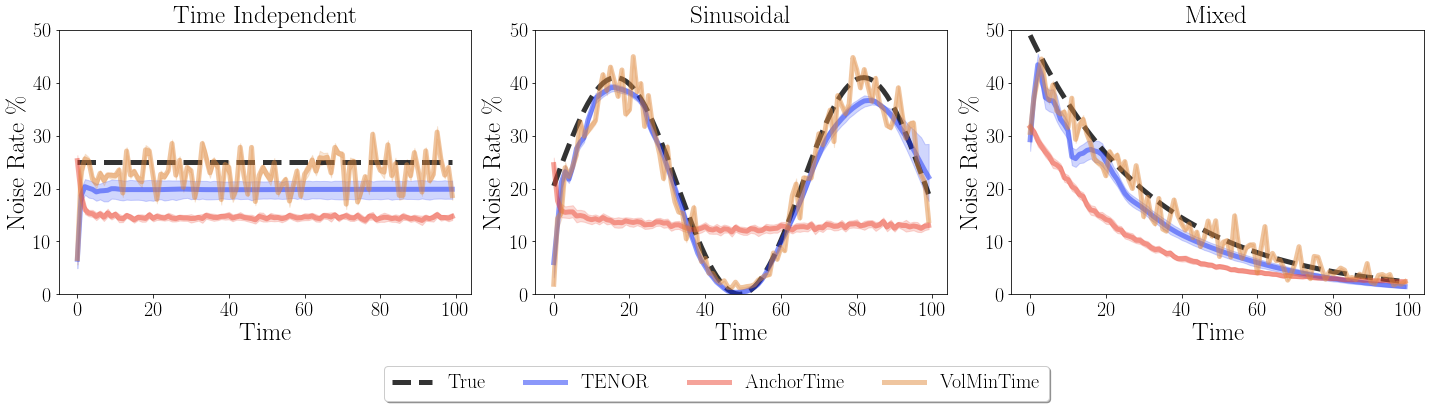

In [6]:
plot_recon_overlay(n_iterations = 10, epochs = 150)

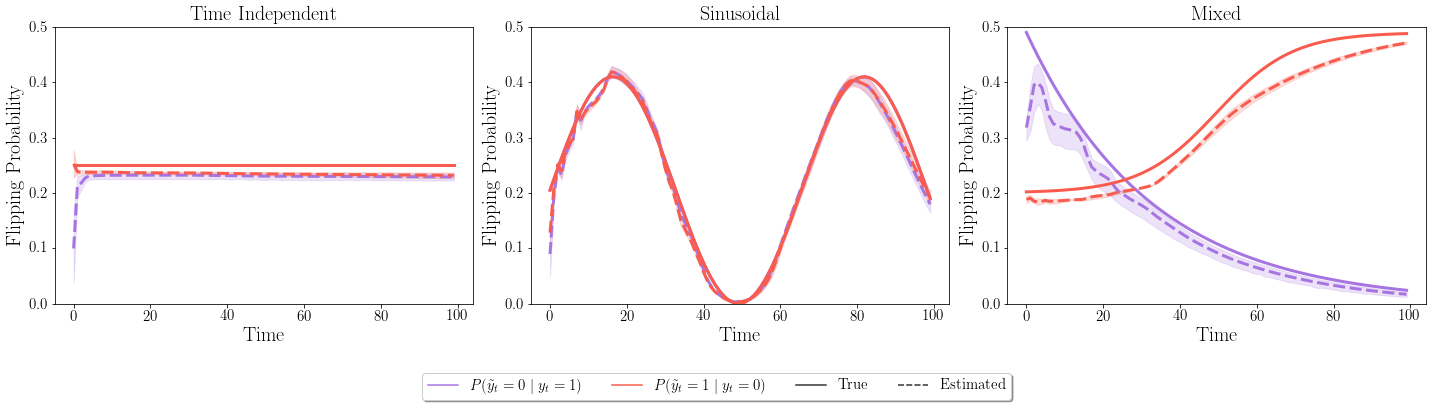

In [99]:
plot_recon(m = "Ours", n_iterations = 5, subset_noise = True)

KeyboardInterrupt: 

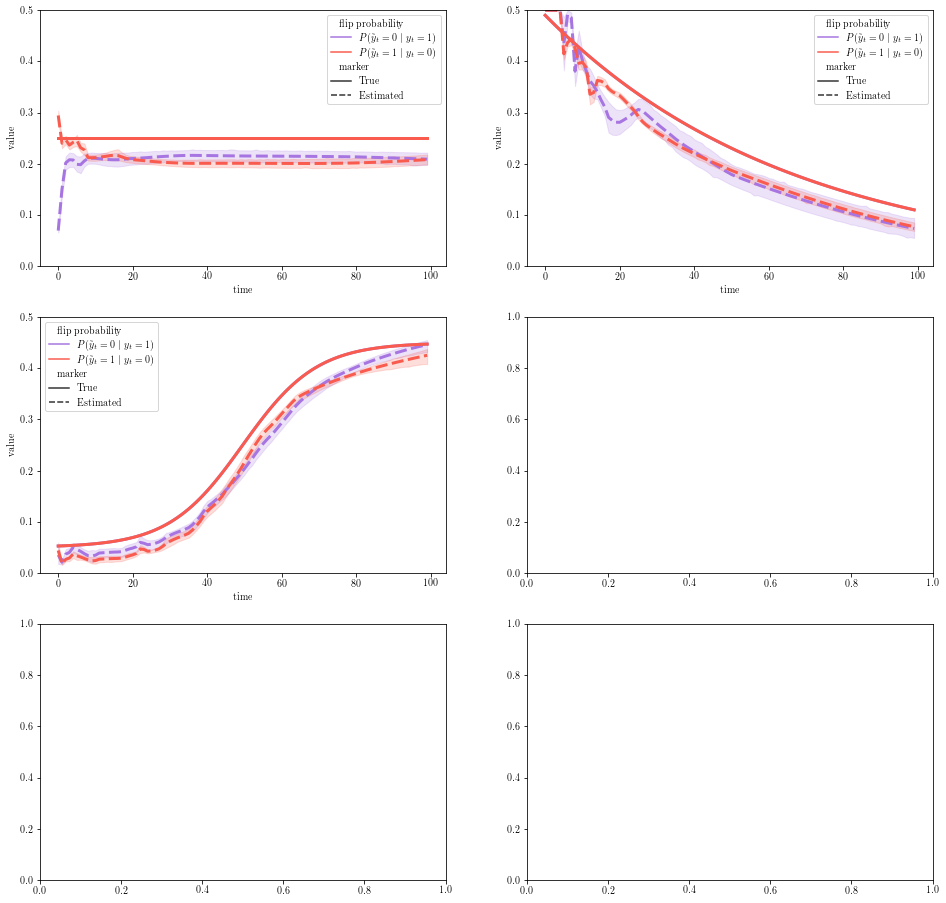

In [100]:
plot_recon(m = "Ours", n_iterations = 5)

In [53]:
df = pd.read_csv("/h/snagaraj/NoisyLabelsTS/results/dataframes/motivation/synthetic/sin/none/GRU/df_high_var_class_independent_n_states_2_n_dims_50.csv")

In [57]:
df.methods.unique()

array(['Forward_Time_Dependent', 'Forward_Time_Independent', 'CE',
       'Backward_Time_Dependent', 'Backward_Time_Independent'],
      dtype=object)

In [58]:
from ast import literal_eval
x = df[(df["noise_frequency"]==0.4) & (df["methods"]=="CE")].accuracy_time.values

lis = [literal_eval(i) for i in x]

x = 1-np.array(lis)
x.shape

(10, 100)

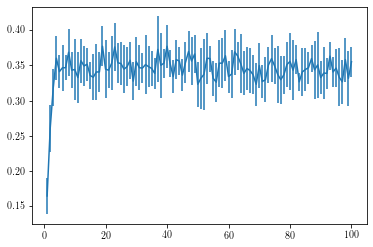

In [59]:
# calculate mean and standard deviation
data_mean = x.mean(axis=0)
data_std = x.std(axis=0)

# plot mean with standard deviations as errorbars
plt.errorbar(range(1,101), data_mean, yerr=data_std, label='mean and standard deviation')
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

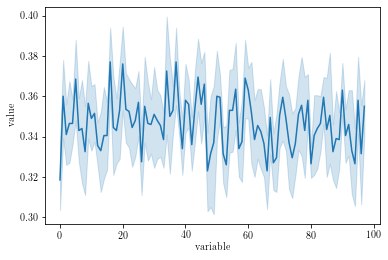

In [61]:
df = pd.DataFrame(x[:,2:]).melt()
df
sns.lineplot(data = df, x = "variable", y = "value")